# Circadian Simulation of Goldbeter's Circadian Oscillator Model




## Goldbeter's model - Circadian Oscillator of PER


### Scheme of PER Oscillator

<img src="img/MODEL_circadian_goldbeter1996.png">
*Source: Ingalls, B. P. (2013). *


### Mathematical Formula - ODE System

$$\frac{d}{dt}m(t) = \frac{v_s}{1+(p_N(t)/K_I)^n} - \frac{v_m m(t)}{K_{m1} + m(t)}$$

$$\frac{d}{dt}p_0(t) = k_s m(t) - \frac{V_1 p_0(t)}{K_1 + p_0(t)} + \frac{V_2p_1(t)}{K_2 + p_1(t)}$$

$$\frac{d}{dt}p_1(t) = \frac{V_1p_0(t)}{K_1 + p_0(t)} - \frac{V_2p_1(t)}{K_2 + p_1(t)} - \frac{V_3p_1(t)}{K_3 + p1(t)} + \frac{V_4p_2(t)}{K_4+p_2(t)}$$

$$\frac{d}{dt}p_2(t) = \frac{V_3p_1(t)}{K_3 + p_1(t)} - \frac{V_4p_2(t)}{K_4 + p_2(t)} - k_1p_2(t) + k_2p_N(t) - \frac{v_d p_2(t)}{K_d + p_2(t)}$$

$$\frac{d}{dt}p_N(t) = k_1p_2(t) - k_2p_N(t)$$



## References
1. Ingalls, B. P. (2013). Mathematical modeling in systems biology: an introduction. MIT press. ([link](https://books.google.com.tw/books?hl=zh-TW&lr=&id=OYr6AQAAQBAJ&oi=fnd&pg=PR5&dq=Ingalls,+B.+Mathematical+Modeling+in+Systems+Biology+-+an+Introduction.&ots=ucgsG0-NAA&sig=gXJPRtpiAQDzyLYYcGOT5CQBFVc&redir_esc=y#v=onepage&q=Ingalls%2C%20B.%20Mathematical%20Modeling%20in%20Systems%20Biology%20-%20an%20Introduction.&f=false))
2. Goldbeter, A. (1997). Biochemical oscillations and cellular rhythms: the molecular bases of periodic and chaotic behaviour. Cambridge university press. ([link](https://books.google.com.tw/books?hl=en&lr=&id=dKk0I-KMDJIC&oi=fnd&pg=PP1&ots=WVtd4X2-1N&sig=9pWRpEfrLnXo7kqvaTOfQBCpMUU&redir_esc=y#v=onepage&q&f=false))


--- 

In [ ]:
# Installation
using Pkg
Pkg.add(["ModelingToolkit","DifferentialEquations","Plots"])

In [4]:
using ModelingToolkit
using DifferentialEquations
using Plots

#PARAMETERS
@parameters t
@parameters vs vm vd
@parameters ks k1 k2
@parameters V1 V2 V3 V4
@parameters K1 K2 K3 K4 KI Km1 Kd n
@variables m(t) p0(t) p1(t) p2(t) pn(t)
@derivatives D'~t

#CHEMICAL REACTIONS
mm(v, k, sub) = v*sub/(k+sub)
hill(v,p,k,n) = v/(1+(p/k)^n)


eqs = [
    D(m)  ~ hill(vs, pn, KI, n) - mm(vm, Km1, m),
    D(p0) ~ ks*m - mm(V1, K1,p0) + mm(V2, K2, p1),
    D(p1) ~ mm(V1, K1, p0) - mm(V2, K2,p1) - mm(V3, K3, p1) + mm(V4, K4, p2),
    D(p2) ~ mm(V3, K3, p1) - mm(V4, K4, p2) - k1*p2 + k2*pn - mm(vd,Kd,p2),
    D(pn) ~ k1*p2-k2*pn
]

#DEFINE PROBLEM
de = ODESystem(eqs)
PER = ODEFunction(de,
                [m,p0, p1, p2, pn],
                [vs,vm,vd,ks,k1,k2,V1,V2,V3,V4,K1,K2,K3,K4,KI,Km1,Kd,n]
                )

#SET VALUE
u0 = [2,0,2.0,2.0,2.0]
p = (
    vs=0.76, vm=0.65, vd=0.95,
    ks=0.38, k1=1.9, k2=1.3,
    V1=3.2, V2=1.58, V3=5.0, V4=2.5,
    K1=1.0, K2=1.0, K3=1.0, K4=1.0,
    KI=1.0, Km1=0.5, Kd=0.2, n=4.0
    )
tspan = (0.0, 100.0)

#SOLVE
prob = ODEProblem(PER, u0, tspan, values(p));
sol = solve(prob);

#PLOTTING
plotly()
labels = ["m" "p0" "p1" "p2" "pn"]

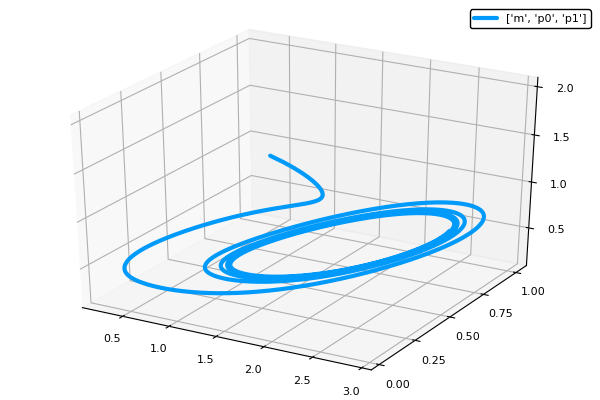

In [16]:
pyplot() #plotly() # For Interactive Display
plot(sol, vars=(1,2,3), label=labels[1:3])

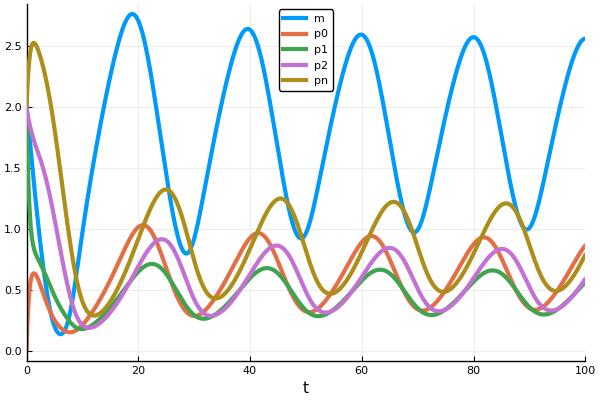

In [18]:
pyplot() #plotly() # For Interactive Display
plot(sol, label=labels)